In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') 
plt.rcParams.update({'font.size':14})
plt.rcParams["font.family"] = "Times New Roman"

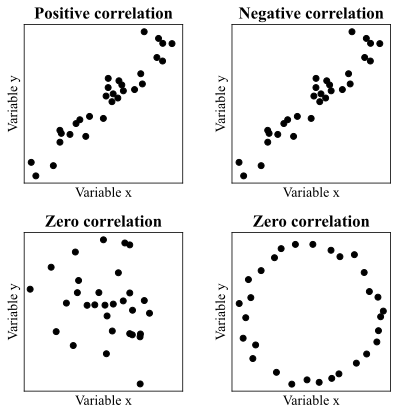

In [2]:
N = 30

# correlated random variables
x = np.linspace(0,10,N) + np.random.randn(N) #np.linspace(0,10,N) : 0~10까지 균등하게 나눈 N개의 값으로 이뤄진 배열 생성 ex. [0, 2.5, 5, 7.5, 10]
y = x + np.random.randn(N) # 평균이 0이고 표준편차가 1인 정규분포에서 N개의 난수 생성

# set up figure
_, axs = plt.subplots(2,2, figsize=(6,6))


axs[0,0].plot(x,y,'ko')
axs[0,0].set_title("Positive correlation", fontweight='bold')
axs[0,0].set_xlabel('Variable x')
axs[0,0].set_ylabel('Variable y')
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])
axs[0,0].axis('square')

axs[0,1].plot(x,y,'ko')
axs[0,1].set_title("Negative correlation", fontweight='bold')
axs[0,1].set_xlabel('Variable x')
axs[0,1].set_ylabel('Variable y')
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])
axs[0,1].axis('square')

axs[1,0].plot(np.random.randn(N), np.random.randn(N), 'ko')
axs[1,0].set_title("Zero correlation", fontweight='bold')
axs[1,0].set_xlabel('Variable x')
axs[1,0].set_ylabel('Variable y')
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])
axs[1,0].axis('square')

# cos, sin 함수로 원형 그래프 생성
x= np.cos(np.linspace(0, 2*np.pi, N)) + np.random.randn(N)/20 #0~2π까지 N개의 균등한 간격의 점을 생성 #np.random~ : 작은 랜덤 노이즈 생성(완벽한 원이 아닌 흐트러진 원형 패턴 생성)
y = np.sin(np.linspace(0, 2*np.pi, N)) + np.random.randn(N)/20

axs[1,1].plot(x,y,'ko')
axs[1,1].set_title("Zero correlation", fontweight='bold')
axs[1,1].set_xlabel('Variable x')
axs[1,1].set_ylabel('Variable y')
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])
axs[1,1].axis('square')

plt.tight_layout()
plt.savefig('Figure_03_01.png', dpi=600)
plt.show()


In [5]:
def corrAndCosine(x,y):
    
    #compute cosine similarity
    num = np.dot(x,y) #numerator(분자)
    den = np.linalg.norm(x) * np.linalg.norm(y) #denominator(분모)
    cos = num / den

    # compute correlation (similar to above but mean-centered!) - 위의 방식과 유사하지만 평균 중심 계산 방식임
    xm = x-np.mean(x)
    ym = y-np.mean(y)
    num = np.dot(xm, ym) #numerator
    den = np.linalg.norm(xm) * np.linalg.norm(ym) #denominator
    cor = num / den

    return cor, cos

# test it
a = np.random.randn(15)
b = np.random.randn(15)

# compute the correlation and cosine(상관계수 , 코사인 유사도)
r, c = corrAndCosine(a,b)

# confirm that the correlation matches with np.corrcoef(상관계수 출력)
print(r, np.corrcoef(a,b)[0,1]) 

-0.3892761476275699 -0.3892761476275699


In [6]:
# cosine 유사도 결과 출력(정규화(=평균 중심화)가 적용된 것으로 가정한 것이므로 실제 정규화가 적용되지 않은 상태)

# compare r and c without mean-centering

a = np.random.randn(15) + 10
b = np.random.randn(15)

# mean-center

aNoMean = a - np.mean(a)
bNoMean = b - np.mean(b)

# show the results with and without mean-centering

print('Without mean-centering (should differ):') #정규화가 적용되지 않은 상태 -> 상관계수 != 코사인 유사도 (상관계수는 정규화가 식에 포함되어있지만 코사인 유사도는 포함되어 있지 않음)
print(np.round(corrAndCosine(a,b), 4))
print('  ')

print('With mean-centering (should be the same):') # 정규화가 적용된 상태 -> 상관계수 = 코사인 유사도
print(np.round(corrAndCosine(aNoMean, bNoMean), 4))

Without mean-centering (should differ):
[-0.2052  0.4053]
  
With mean-centering (should be the same):
[-0.2052 -0.2052]


# Exercise 2

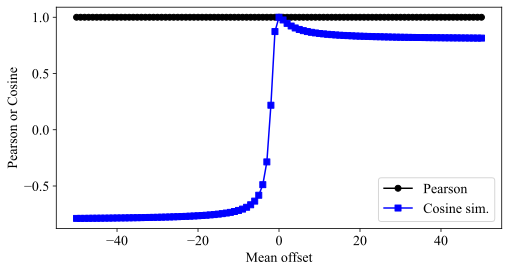

In [12]:
# create the variables
a = np.arange(4, dtype=float) # [0. 1. 2. 3.]
offsets = np.arange(-50,51) # -50~50 정수 배열

# initialize the results
results = np.zeros((len(offsets), 2))

# run the simulation
for i in range(len(offsets)):
    results[i, :] = corrAndCosine(a, a+offsets[i])

plt.figure(figsize=(8,4))
h = plt.plot(offsets, results)
h[0].set_color('k')
h[0].set_marker('o')
h[1].set_color('b')
h[1].set_marker('s')

plt.xlabel('Mean offset')
plt.ylabel('Pearson or Cosine')
plt.legend(['Pearson', 'Cosine sim.'])
plt.savefig('Figure_03_02.png', dpi=600)
plt.show()

# 결과 해석
# 1) 피어슨 상관계수 : [0,1,2,3] 배열에 offset을 더했을 때 원본의 offset배수만큼 정비례하므로 선형 관계 => 항상 1
# 2) 코사인 유사도  : offset 값이 커질 수록 벡터의 크기(노름 = 분모)도 커지므로 코사인 유사도는 점점 1에서 멀어짐, offset=0이면 원본 배열과 완전히 동일하므로 코사인 유사도 = 1

## Exercise 3

In [15]:
from scipy.stats import pearsonr
??pearsonr

Signature: pearsonr(x, y, *, alternative='two-sided', method=None, axis=0)
Source:   
def pearsonr(x, y, *, alternative='two-sided', method=None, axis=0):
    r"""
    Pearson correlation coefficient and p-value for testing non-correlation.

    The Pearson correlation coefficient [1]_ measures the linear relationship
    between two datasets. Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear relationship.
    Positive correlations imply that as x increases, so does y. Negative
    correlations imply that as x increases, y decreases.

    This function also performs a test of the null hypothesis that the
    distributions underlying the samples are uncorrelated and normally
    distributed. (See Kowalski [3]_
    for a discussion of the effects of non-normality of the input on the
    distribution of the correlation coefficient.)
    The p-value roughly indicates the probability 

In [18]:
# 모듈 사용하기

a = np.random.randn(15)
b = np.random.randn(15)

# mean-center

aNoMean = a - np.mean(a)
bNoMean = b - np.mean(b)

print(pearsonr(a,b))
print('\n')
print(pearsonr(aNoMean, bNoMean))

PearsonRResult(statistic=np.float64(-0.1964178792133002), pvalue=np.float64(0.48292305888374365))


PearsonRResult(statistic=np.float64(-0.1964178792133002), pvalue=np.float64(0.48292305888374365))


## Exercise 4

In [20]:
# np.corrcoef 함수와 직접 정의한 상관관계 함수 수행 시간 비교하기

def rho(x,y):
    xm=x-np.mean(x)
    ym=y-np.mean(y)
    n=np.dot(xm,ym)
    d=np.linalg.norm(xm)*np.linalg.norm(ym)
    return n/d

import time

numIters = 1000
varLength = 500

tic = time.time() # 시작 시간
for i in range(numIters):
    x=np.random.randn(varLength, 2) #500*2 표준 정규분포(평균=0, 표준편차=1) 행렬
    rho(x[:,0], x[:,1])
t1 = time.time() - tic # 종료 시간 - 시작 시간 = 실행 시간

tic = time.time()
for i in range(numIters):
    x=np.random.randn(varLength, 2)
    pearsonr(x[:,0], x[:,1])
t2 = time.time() - tic

print(f'My function took {t1*1000:.2f} ms') #t1, t2 는 초(seconds) 단위이므로 1000을 곱해서 milliseconds 로 변환
print('\n')
print(f'   pearsonr took {t2*1000:.2f} ms')

# 결과 해석
## pearsonr 함수가 약 3배 더 오래 걸림

My function took 34.80 ms


   pearsonr took 76.79 ms
